In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from base import MNIST, Baseline, Pruner
from simulated_annealing import SimulatedAnnealingPruner
from genetic_algorithm import GeneticAlgorithmPruner

In [2]:
if tf.config.list_physical_devices('GPU'):
    physical_devices = tf.config.list_physical_devices('GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print('Using GPU:', tf.test.gpu_device_name())
    !nvcc -V
else: raise ValueError('Running on CPU is not recommended.')
print('TensorFlow version:', tf.__version__)

Using GPU: /device:GPU:0
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
TensorFlow version: 2.17.0


Training data shape: (60000, 28, 28, 1)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28, 1)
Test labels shape: (10000,)
Input shape: (28, 28, 1)
Number of classes: 10


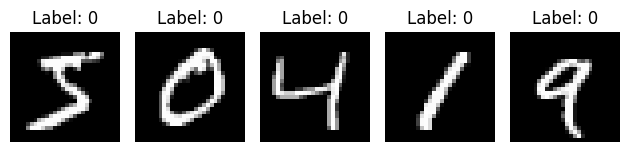

In [4]:
data = MNIST()
print(data)
data.display_sample_images()

# Baseline Training

In [6]:
%%time
baseline = Baseline(data, model_path='LeNet.keras')
baseline.build_and_compile_lenet(optimizer=SGD(learning_rate=0.1))
baseline.train(val_ratio=0.2, epochs=50, batch_size=128)

Model: "LeNet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ Conv1 (Conv2D)                      │ (None, 28, 28, 6)            │           156 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ AvgPool1 (AveragePooling2D)         │ (None, 14, 14, 6)            │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ Conv2 (Conv2D)                      │ (None, 10, 10, 16)           │         2,416 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ AvgPool2 (AveragePooling2D)         │ (None, 5, 5, 16)             │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ Flatten (Flatten)                   │ (None, 400)                  │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ FC1 (Dense)                         │ (None, 120)                  │        48,120 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ FC2 (Dense)                         │ (None, 84)                   │        10,164 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ Output (Dense)                      │ (None, 10)                   │           850 │    Y    │
└─────────────────────────────────────┴──────────────────────────────┴───────────────┴─────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1016 - loss: 2.3152 - val_accuracy: 0.1146 - val_loss: 2.3022
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1028 - loss: 2.3066 - val_accuracy: 0.1146 - val_loss: 2.3034
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1014 - loss: 2.3065 - val_accuracy: 0.0987 - val_loss: 2.3061
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1048 - loss: 2.3053 - val_accuracy: 0.1146 - val_loss: 2.3044
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1025 - loss: 2.3055 - val_accuracy: 0.1007 - val_loss: 2.3040
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1053 - loss: 2.3042 - val_accuracy: 0.1026 - val_loss: 2.3034
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1108 - loss: 2.3041 - val_accuracy: 0.1026 - val_loss: 2.3011
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1101 - loss: 2.3020 - val_accuracy: 0.

Model name: LeNet
Total weights: 61470
Test loss: 0.0895
Test metrics: 0.9722999930381775
Prunable layers: [0, 2, 5, 6, 7]



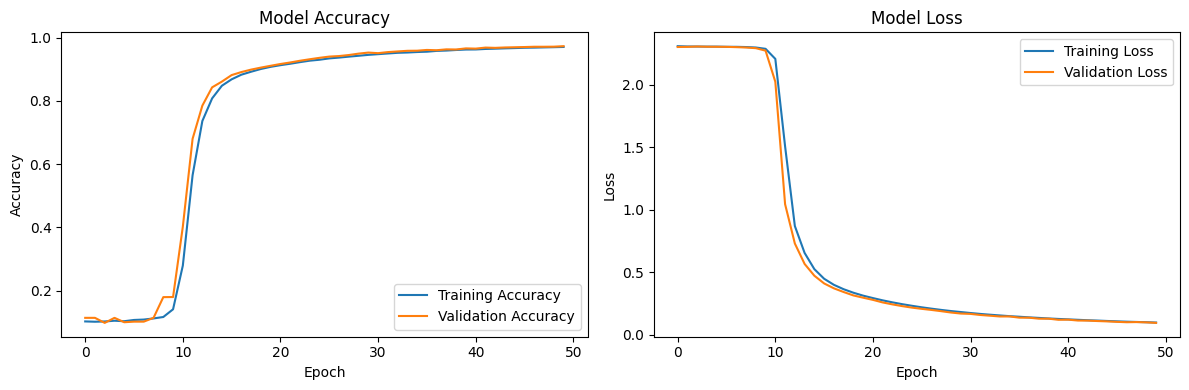

In [30]:
print(
    f'Model name: {baseline.model.name}\n'
    f'Total weights: {baseline.total_weights}\n'
    f'Test loss: {baseline.loss:.4f}\n'
    f'Test metrics: {baseline.metrics}\n'
    f'Prunable layers: {baseline.prunable_layers}\n'
)
baseline.plot_training_history()

# Simulated Annealing

In [28]:
%%time
sa_pruner = SimulatedAnnealingPruner(
    baseline, initial_temperature=1.0, iterations=200,
    mutation_rate=0.15, loss_to_warmup=1.0, max_loss_penalty=1e8
)
best_masks, best_obj_dict = sa_pruner.prune()

,layer,temperature,mutation_rate,cost,metrics,loss,sparsity
0,0,1.000000,0.15000,44.117669,0.9700,0.095860,0.022667
1,0,0.590616,0.14925,20.270704,0.9661,0.110394,0.049333
2,0,0.383224,0.14700,15.957940,0.9665,0.111735,0.062667
3,0,0.324734,0.14475,12.296342,0.9609,0.124985,0.081333
4,0,0.239346,0.13275,10.564411,0.9638,0.121586,0.094667
5,0,0.207098,0.11625,10.136114,0.9634,0.120756,0.098667
6,0,0.201969,0.11175,9.616637,0.9625,0.124863,0.104000
7,0,0.190531,0.09825,9.376112,0.9636,0.122827,0.106667
8,0,0.188059,0.09450,8.929733,0.9636,0.123553,0.112000
9,0,0.183734,0.08700,8.929733,0.9636,0.123553,0.112000


  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

CPU times: user 10min 36s, sys: 55.7 s, total: 11min 32s
Wall time: 11min 43s


In [29]:
print(sa_pruner.calculate_objective())
display(sa_pruner.pruned_model.evaluate(data.x_test, data.y_test))
sa_pruner.get_layer_weights(0)

{'cost': 3.096420874219574, 'metrics': 0.8744000196456909, 'loss': 0.9923161268234253, 'sparsity': 0.4383519841269841}
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8530 - loss: 1.0395


[0.9923161268234253, 0.8744000196456909]

array([[[[-0.        , -0.        , -0.60962415,  0.        ,
           0.        , -0.        ]],

        [[-0.93241346, -0.        , -0.        ,  0.        ,
           0.        , -0.38420042]],

        [[-0.94215405, -0.41273054,  0.        ,  0.        ,
          -0.2768706 , -0.518196  ]],

        [[-1.0420051 , -0.        ,  0.31613517,  0.6434473 ,
          -0.        , -0.28065953]],

        [[-1.2123276 , -0.        , -0.        ,  0.        ,
          -0.        ,  0.        ]]],


       [[[-0.        , -0.        ,  0.        ,  0.        ,
          -0.        , -0.        ]],

        [[-0.        , -0.        ,  0.7032357 ,  0.        ,
          -0.6436758 , -0.9941351 ]],

        [[-0.        ,  0.        ,  0.8962542 ,  0.        ,
          -0.        , -0.        ]],

        [[-0.        ,  0.        ,  0.9600996 ,  0.        ,
          -0.        , -0.        ]],

        [[-0.        ,  0.        ,  0.47225854,  0.        ,
          -0.        , -0.1

# Genetic Algorithm

In [ ]:
%%time
ga_pruner = GeneticAlgorithmPruner(
    baseline, num_generations=20, population_size=12,
    tournament_size=5, crossover_rate=0.9, mutation_rate=0.15,
    elite_size=2, loss_to_warmup=1.0, max_loss_penalty=1e8
)
best_masks, best_obj_dict = ga_pruner.prune()

,layer,generation,mutation_rate,cost,metrics,loss,sparsity
0,0,0,0.1500,23.437568,0.9719,0.095281,0.042667
1,0,1,0.1425,15.000298,0.9696,0.104005,0.066667
2,0,2,0.1350,11.539188,0.9661,0.113659,0.086667
3,0,3,0.1275,10.000974,0.9672,0.117920,0.100000
4,0,4,0.1200,10.000974,0.9672,0.117920,0.100000
5,0,5,0.1125,10.000974,0.9672,0.117920,0.100000
6,0,6,0.1050,10.000974,0.9672,0.117920,0.100000
7,0,7,0.0975,10.000974,0.9672,0.117920,0.100000
8,0,8,0.0900,10.000974,0.9672,0.117920,0.100000
9,0,9,0.0825,9.616832,0.9649,0.124748,0.104000


CPU times: user 29min 29s, sys: 2min 2s, total: 31min 31s
Wall time: 27min 46s


In [ ]:
print(ga_pruner.calculate_objective())
display(ga_pruner.pruned_model.evaluate(data.x_test, data.y_test))
ga_pruner.get_layer_weights(0)

{'cost': 3.154656612299982, 'metrics': 0.8902000188827515, 'loss': 0.9442296028137207, 'sparsity': 0.41334543650793654}
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8703 - loss: 0.9876


[0.9442296028137207, 0.8902000188827515]

array([[[[-0.        , -0.        , -0.        ,  1.0125567 ,
           0.        ,  0.        ]],

        [[-0.        , -0.        , -0.        ,  0.57474077,
          -0.13879445, -0.13924469]],

        [[-0.        , -0.46900725, -0.        ,  0.03121991,
          -0.        , -0.40742308]],

        [[-0.9247112 , -0.        , -0.        , -0.06106901,
          -0.34354758, -0.        ]],

        [[-1.0939245 , -0.62653023, -0.        ,  0.        ,
          -0.        ,  0.        ]]],


       [[[-1.0271453 , -0.32901156, -0.        ,  0.35791805,
          -0.        , -0.        ]],

        [[-0.        ,  0.35310966,  0.        , -0.        ,
          -0.        , -0.67341036]],

        [[-0.        ,  0.        ,  0.        , -0.        ,
          -0.8643391 , -1.0009904 ]],

        [[-0.        ,  0.7362697 ,  0.        , -0.        ,
          -0.        , -0.9407785 ]],

        [[-0.        ,  0.        ,  0.41468048, -0.        ,
          -0.        , -0.4